<a href="https://colab.research.google.com/github/ja20835/team25.Titanic/blob/main/Team25_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Data Analysis
import pandas as pd
import numpy as np
pd.set_option('precision', 3)
pd.set_option('mode.chained_assignment', None)

In [ ]:
#Visualisation of Data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter

In [ ]:
#Machine-Learning
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

In [ ]:
#github link for data
! git clone https://github.com/ja20835/team25.Titanic.git

Cloning into 'team25.Titanic'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 14 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (14/14), done.


In [ ]:
#Read data
train = pd.read_csv('team25.Titanic/train.csv')
test = pd.read_csv('team25.Titanic/test.csv')

In [ ]:
print('Shape of train: ', train.shape, '\n')
print(train.head())

Shape of train:  (891, 12) 

   PassengerId  Survived  Pclass  ...    Fare Cabin  Embarked
0            1         0       3  ...   7.250   NaN         S
1            2         1       1  ...  71.283   C85         C
2            3         1       3  ...   7.925   NaN         S
3            4         1       1  ...  53.100  C123         S
4            5         0       3  ...   8.050   NaN         S

[5 rows x 12 columns]


In [ ]:
print('Shape of test: ', test.shape, '\n')
print(test.head())

Shape of test:  (418, 11) 

   PassengerId  Pclass  ... Cabin Embarked
0          892       3  ...   NaN        Q
1          893       3  ...   NaN        S
2          894       2  ...   NaN        Q
3          895       3  ...   NaN        S
4          896       3  ...   NaN        S

[5 rows x 11 columns]


In [ ]:
def detectOutliers(df, n, features):

    outlierCol = []
    
    for column in features:
      # Find First Quartile and Third Quartile values
        Q1 = np.percentile(df[column], 25)
        Q3 = np.percentile(df[column], 75)
        # Equation for Interquartile Range
        iqr = Q3 - Q1
        
        # Equation for defining Upper and Lower bounds
        outlierBounds = 1.5 * iqr
        outlierListColumn = df[(df[column] < Q1 - outlierBounds) | (df[column] > Q3 + outlierBounds)].index
        outlierCol.extend(outlierListColumn)
        
    # Show columns containing more than 2 outliers
    outlierCol = Counter(outlierCol)        
    multipleOutliers = list(k for k, v in outlierCol.items() if v > n )
    return multipleOutliers   

# Show outliers from columns Age, SibSp, Parch, Fare
droppedOutliers = detectOutliers(train, 2, ["Age", 'SibSp', 'Parch', 'Fare'])

In [ ]:
# Show outliers
train.loc[droppedOutliers]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [ ]:
# Drop outliers
train = train.drop(droppedOutliers, axis = 0).reset_index(drop = True)

In [ ]:
def missing_percent(df):
  total = df.isnull().sum().sort_values(ascending = False)
  percent = round(total * 100 / len(df), 2)
  return pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent(%)'])

In [ ]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  881 non-null    int64  
 1   Survived     881 non-null    int64  
 2   Pclass       881 non-null    int64  
 3   Name         881 non-null    object 
 4   Sex          881 non-null    object 
 5   Age          711 non-null    float64
 6   SibSp        881 non-null    int64  
 7   Parch        881 non-null    int64  
 8   Ticket       881 non-null    object 
 9   Fare         881 non-null    float64
 10  Cabin        201 non-null    object 
 11  Embarked     879 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 82.7+ KB
None


In [ ]:
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
dtype: int64


In [ ]:
missing_percent(train)

,Total,Percent(%)
Cabin,680,77.19
Age,170,19.30
Embarked,2,0.23
Fare,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


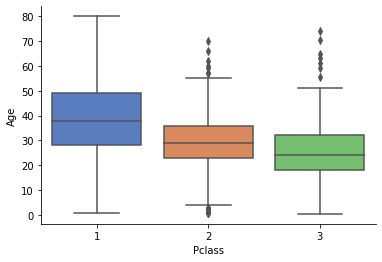

In [ ]:
# Show mean age by class for train
sns.boxplot(x = 'Pclass', y = 'Age', data = train, palette = 'muted')
sns.despine()

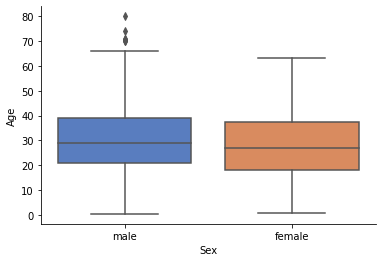

In [ ]:
# Show mean age by sex for train
sns.boxplot(x = 'Sex', y = 'Age', data = train, palette = 'muted')
sns.despine()

In [ ]:
# Return average male age for each class. class1 = 34. class2  = 30. class3 = 28
def imputeAgeMale_train(columns):
  Age = columns [0]
  Pclass = columns [1]
  Sex = columns [2]
  if pd.isnull(Age) & (Sex == 'male'):
    if Pclass == 1:
      return 34
    elif Pclass == 2:
        return 30
    else:
          return 28
  else:
        return Age

In [ ]:
# Return average female age for each class. class1 = 33. class2  = 29. class3 = 27
def imputeAgeFemale_train(columns):
  Age = columns [0]
  Pclass = columns [1]
  Sex = columns [2]
  if pd.isnull(Age) & (Sex == 'female'):
    if Pclass == 1:
      return 33
    elif Pclass == 2:
        return 29
    else:
          return 27
  else:
        return Age

In [ ]:
# Impute new values for Age and Embarked into train
train['Age'] = train[['Age', 'Pclass', 'Sex']].apply(imputeAgeMale_train, axis = 1)
train['Age'] = train[['Age', 'Pclass', 'Sex']].apply(imputeAgeFemale_train, axis = 1)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace = True)
print("Age =", train.Age.isnull().sum(), "Null Values")
print("Embarked =", train.Embarked.isnull().sum(), "Null Values")

Age = 0 Null Values
Embarked = 0 Null Values


In [ ]:
print(test.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [ ]:
missing_percent(test)

,Total,Percent(%)
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
Embarked,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


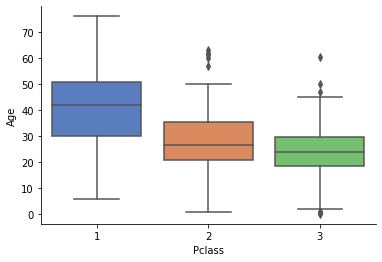

In [ ]:
# Show mean age by class for test
sns.boxplot(x = 'Pclass', y = 'Age', data = test, palette = 'muted')
sns.despine()

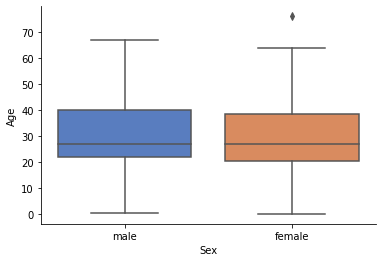

In [ ]:
# Show mean age by sex for test
sns.boxplot(x = 'Sex', y = 'Age', data=test, palette='muted')
sns.despine()

In [ ]:
# Return average male age for each class. class1 = 36. class2 = 30. class3 = 27
def imputeAgeMale_test(columns):
  Age = columns [0]
  Pclass = columns [1]
  Sex = columns [2]
  if pd.isnull(Age) & (Sex == 'male'):
    if Pclass == 1:
      return 36
    elif Pclass == 2:
        return 30
    else:
          return 27
  else:
        return Age

In [ ]:
# Return average female age for each class. class1 = 36. class2 = 30. class3 = 27
def imputeAgeFemale_test(columns):
  Age = columns [0]
  Pclass = columns [1]
  Sex = columns [2]
  if pd.isnull(Age) & (Sex == 'female'):
    if Pclass == 1:
      return 36
    elif Pclass == 2:
        return 30
    else:
          return 27
  else:
        return Age

In [ ]:
# Impute new values for Age and Fare into test
test['Age'] = test[['Age', 'Pclass', 'Sex']].apply(imputeAgeMale_test, axis = 1)
test['Age'] = test[['Age', 'Pclass', 'Sex']].apply(imputeAgeFemale_test, axis = 1)
test['Fare'].fillna(test['Fare'].median(), inplace = True)
print("Age =", test.Age.isnull().sum(), "Null or NaN Values")
print("Fare =", test.Fare.isnull().sum(), "Null or NaN Values")

Age = 0 Null or NaN Values
Fare = 0 Null or NaN Values


In [ ]:
# Drop Cabin column from train & test
train.drop('Cabin', axis = 1, inplace = True)
test.drop('Cabin', axis = 1, inplace = True)

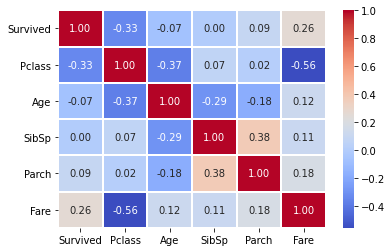

In [ ]:
# Heatmap to show correlation between Survived and numerical columns
# This shows that Fare has a strong correlation to Survival, possible due to the passengers being richer and therefore prioritised during evacuation
sns.heatmap(train[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr(), cmap = 'coolwarm', annot = True, fmt = '.2f', linewidths = 1)

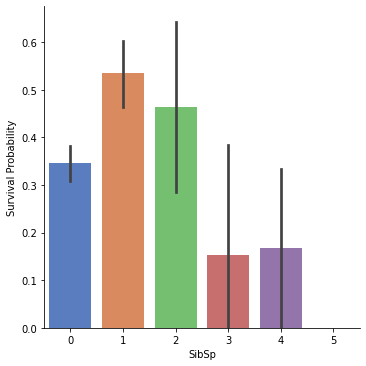

In [ ]:
# Plot to show Survival Probability dependant on SibSp
SibSpPlot = sns.catplot(x = 'SibSp', y = 'Survived', data = train, kind = 'bar', palette = 'muted')
SibSpPlot.set_ylabels ('Survival Probability')

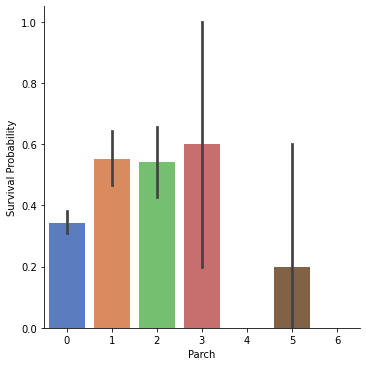

In [ ]:
# Plot to show Survival Probability dependant on Parch
ParchPlot = sns.catplot(x = 'Parch', y = 'Survived', data = train, kind = 'bar', palette = 'muted')
ParchPlot.set_ylabels ('Survival Probability')

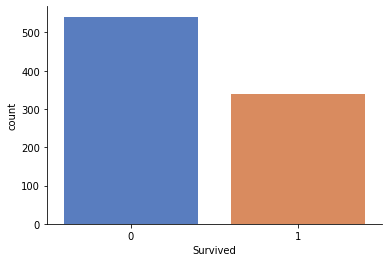

In [ ]:
# Plot to show a count of those who did or did not survive
sns.countplot(x = 'Survived', data = train, palette = 'muted')
sns.despine()

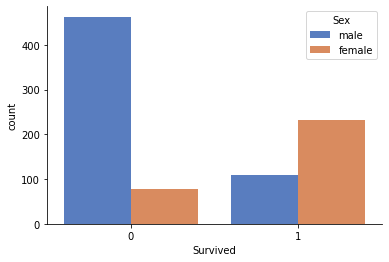

In [ ]:
# Plot showing survival, split by Sex
# Here we see that many more males died, than females
sns.countplot(x = 'Survived', hue = 'Sex', data = train, palette = 'muted')
sns.despine()

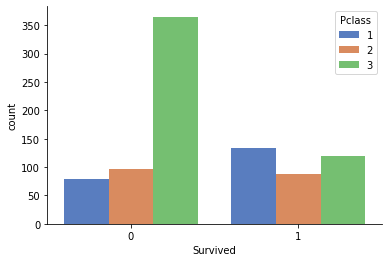

In [ ]:
# Plot showing survival, split by Pclass
# Here we see class3 passengers were far more likely to not survive
sns.countplot(x = 'Survived', hue = 'Pclass', data = train, palette = 'muted')
sns.despine()

In [ ]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629
1,2,0.473
2,3,0.246


In [ ]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.748
1,male,0.191


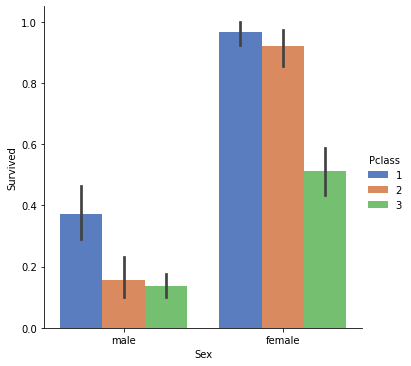

In [ ]:
# Plot showing survival, split by Sex and Pclass
# Here we see that females of Class1 and Class2 were much more likely to survive than anyone else
sns.catplot(x = 'Sex', y = 'Survived', hue = 'Pclass', kind = 'bar', data = train, palette = 'muted')

In [ ]:
train[['SibSp','Survived']].groupby(['SibSp'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.536
2,2,0.464
0,0,0.345
4,4,0.167
3,3,0.154
5,5,0.000


In [ ]:
train[['Parch','Survived']].groupby(['Parch'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600
1,1,0.551
2,2,0.543
0,0,0.344
5,5,0.200
4,4,0.000
6,6,0.000


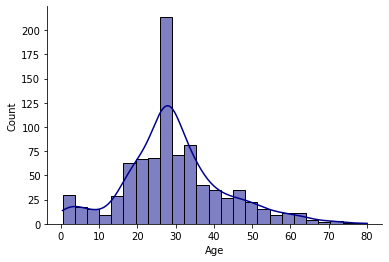

In [ ]:
sns.histplot(train['Age'], kde = True, bins = 25, color = 'darkblue')
sns.despine()

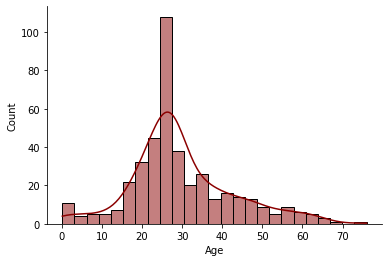

In [ ]:
sns.histplot(test['Age'], kde = True, bins = 25, color = 'darkred')
sns.despine()

In [ ]:
# Equation for family size using values from SibSp & Parch
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

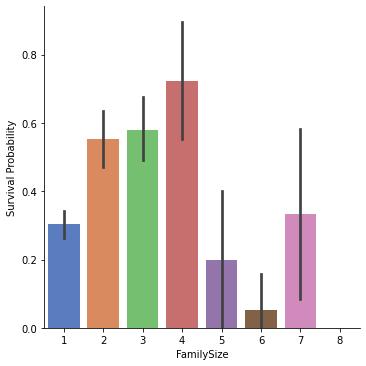

In [ ]:
# Plot showing survival, dependant on family size
# Here we see that having a medium, or small sized family is best for survival. While larger families were the worst
familyPlot = sns.catplot(x = 'FamilySize', y = 'Survived', data = train, kind = 'bar', palette = 'muted')
familyPlot.set_ylabels('Survival Probability')

In [ ]:
# Create Family column in train
train['Alone'] = train['FamilySize'].map(lambda s: 1 if s == 1 else 0)
test['Alone'] = test['FamilySize'].map(lambda s: 1 if s == 1 else 0)
train['SmallF'] = train['FamilySize'].map(lambda s: 1 if  s == 2  else 0)
test['SmallF'] = test['FamilySize'].map(lambda s: 1 if  s == 2  else 0)
train['MediumF'] = train['FamilySize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
test['MediumF'] = test['FamilySize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
train['LargeF'] = train['FamilySize'].map(lambda s: 1 if s >= 5 else 0)
test['LargeF'] = test['FamilySize'].map(lambda s: 1 if s >= 5 else 0)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,Alone,SmallF,MediumF,LargeF
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,S,2,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.283,C,2,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,S,1,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,S,2,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,S,1,1,0,0,0


In [ ]:
sex_train = pd.get_dummies(train['Sex'], sparse = False)
sex_test = pd.get_dummies(test['Sex'], sparse = False)
embarked_train = pd.get_dummies(train['Embarked'], sparse = False)
embarked_test = pd.get_dummies(test['Embarked'], sparse = False)

In [ ]:
train.drop(['Name', 'Sex', 'Ticket', 'Embarked'], axis = 1, inplace = True)
test.drop(['Name', 'Sex', 'Ticket', 'Embarked'], axis = 1, inplace = True)

In [ ]:
train = pd.concat([train, sex_train, embarked_train], axis = 1)
test = pd.concat([test, sex_test, embarked_test], axis = 1)

In [ ]:
pd.DataFrame(abs(train.corr()['Survived']).sort_values(ascending = False))

,Survived
Survived,1.000
male,0.546
female,0.546
Pclass,0.334
Fare,0.265
Alone,0.211
MediumF,0.193
C,0.167
SmallF,0.162
S,0.148


In [ ]:
print('Shape of train: ', train.shape, '\n')
print(train.head())

Shape of train:  (881, 17) 

   PassengerId  Survived  Pclass   Age  SibSp  ...  female  male  C  Q  S
0            1         0       3  22.0      1  ...       0     1  0  0  1
1            2         1       1  38.0      1  ...       1     0  1  0  0
2            3         1       3  26.0      0  ...       1     0  0  0  1
3            4         1       1  35.0      1  ...       1     0  0  0  1
4            5         0       3  35.0      0  ...       0     1  0  0  1

[5 rows x 17 columns]


In [ ]:
print('Shape of test: ', test.shape, '\n')
print(test.head())

Shape of test:  (418, 16) 

   PassengerId  Pclass   Age  SibSp  Parch  ...  female  male  C  Q  S
0          892       3  34.5      0      0  ...       0     1  0  1  0
1          893       3  47.0      1      0  ...       1     0  0  0  1
2          894       2  62.0      0      0  ...       0     1  0  1  0
3          895       3  27.0      0      0  ...       0     1  0  0  1
4          896       3  22.0      1      1  ...       1     0  0  0  1

[5 rows x 16 columns]


In [ ]:
X_train = train.drop('Survived', axis = 1)
y_train = train['Survived']
X_test = test

In [ ]:
lRegression = LogisticRegression(solver = 'newton-cg')
lRegression.fit(X_train, y_train)
lRegressionY_Predict = lRegression.predict(X_test)
lRegressionAcc = lRegression.score(X_train, y_train)
print('Accuracy with the Logistic Regression model is: ', round(lRegressionAcc, 2))

Accuracy with the Logistic Regression model is:  0.82


In [ ]:
dTreeR = DecisionTreeRegressor()
dTreeR.fit(X_train, y_train)
dTreeRY_Predict = dTreeR.predict(X_test)
dTreeRAcc = dTreeR.score(X_train, y_train)
print('Accuracy with the Decision Tree Regressor model is: ', round(dTreeRAcc, 2))

Accuracy with the Decision Tree Regressor model is:  1.0


In [ ]:
kNN = KNeighborsClassifier(n_neighbors = 3)
kNN.fit(X_train, y_train)
kNNY_Predict = kNN.predict(X_test)
kNNAcc = kNN.score(X_train, y_train)
print('Accuracy with the k-Nearest Neighbors model is: ', round(kNNAcc, 2))

Accuracy with the k-Nearest Neighbors model is:  0.8


In [ ]:
rForest = RandomForestClassifier(n_estimators = 75, max_depth = 5, max_leaf_nodes = 35, min_samples_leaf = 10)
rForest.fit(X_train, y_train)
rForestY_Predict = rForest.predict(X_test)
rForestAcc = rForest.score(X_train, y_train)
print('Accuracy with the Random Forest model is: ', round(rForestAcc, 2))

Accuracy with the Random Forest model is:  0.84


In [ ]:
dTree = DecisionTreeClassifier()
dTree.fit(X_train, y_train)
dTreeY_Predict = dTree.predict(X_test)
dTreeAcc = dTree.score(X_train, y_train)
print('Accuracy with the Decision Tree model is: ', round(dTreeAcc, 2))

Accuracy with the Decision Tree model is:  1.0


In [ ]:
mlModels = pd.DataFrame({
    'Model': ['Logistic Regression','Decision Tree Regressor','k-Nearest Neighbor','Random Forest','Decision Tree'],
    'Accuracy Score': [lRegressionAcc, dTreeRAcc, kNNAcc, rForestAcc, dTreeAcc], 
    'Percent (%)': [lRegressionAcc * 100, dTreeRAcc * 100, kNNAcc * 100, rForestAcc * 100, dTreeAcc * 100]})
mlModels.sort_values(by = 'Accuracy Score', ascending = False)

,Model,Accuracy Score,Percent (%)
1,Decision Tree Regressor,1.000,100.000
4,Decision Tree,1.000,100.000
3,Random Forest,0.835,83.541
0,Logistic Regression,0.818,81.839
2,k-Nearest Neighbor,0.802,80.250


In [ ]:
new_gender_submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':rForestY_Predict})
new_gender_submission.to_csv('team25.Titanic/new_gender_submission.csv', index = False)